In [15]:
import os
import sys
import glob
import cv2
import numpy as np
import shutil
import matplotlib.pyplot as plt
sys.path.append('/home/squadx/projects/noaa_adapt/dd-ml-segmentation-benchmark/')
from libs.inference_keras import category2mask

In [85]:
img_paths = sorted(glob.glob('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/*.png'))

In [86]:
label_paths = sorted(glob.glob('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/label-chips/*.png'))

In [87]:
ii = 0

In [179]:
from libs.config import train_ids, test_ids, val_ids, LABELMAP_RGB, LABELMAP, LABELS

In [117]:
LABELMAP_RGB

{0: (255, 0, 255),
 1: (230, 25, 75),
 2: (145, 30, 180),
 3: (60, 180, 75),
 4: (245, 130, 48),
 5: (255, 255, 255),
 6: (0, 130, 200)}

In [145]:
gt_im[:,:,0]

array([[2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4],
       ...,
       [2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4],
       [2, 2, 2, ..., 4, 4, 4]], dtype=uint8)

In [259]:
ii

1033

In [326]:
def label2color(img):
    img = img[:,:,0]
    #gt_im = np.array(cv2.imread(label_paths[ii]))
    mask = mask = np.zeros(img.shape[:2] + (3, ), dtype='uint8')
    
    print(np.unique(img))
    
    for category in LABELMAP.keys():
        indices = np.where(img == category)
        if len(indices[0]):
            mask_color = LABELMAP[category+1]
            mask[indices] = mask_color
            if category > 0:
                label = LABELS[category]
            print(category, mask_color, label)
    return mask

[1 3 4]
1 (180, 30, 145) CLUTTER
3 (48, 130, 245) WATER
4 (255, 255, 255) GROUND


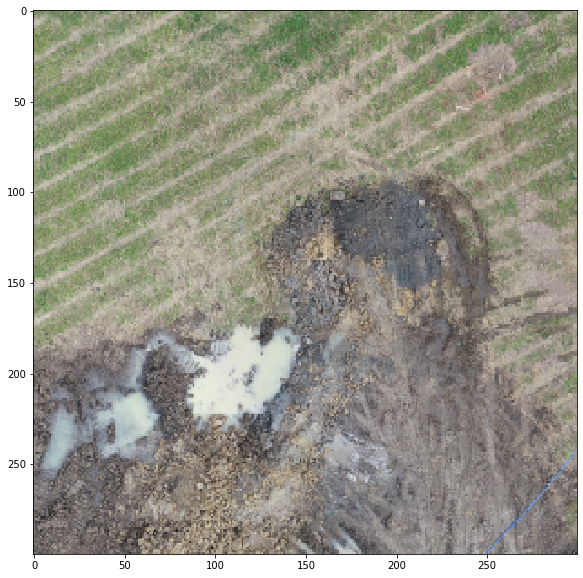

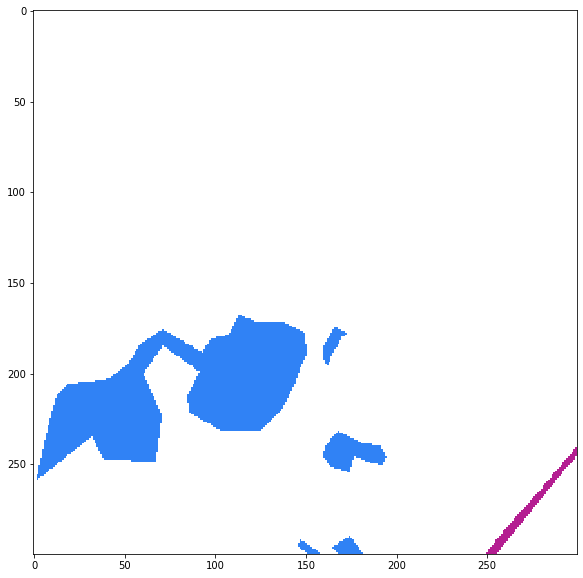

In [341]:
ii = np.random.randint(0,len(img_paths))
im = cv2.imread(img_paths[ii])
gt_im = cv2.imread(label_paths[ii])

plt.figure(figsize=(20,10))
plt.imshow(im[:,:,::-1])
plt.figure(figsize=(20,10))
plt.imshow(label2color(np.array(gt_im)))

In [339]:
# Export the image directory as chips
#sys.path.append('/home/squadx/projects/noaa_adapt/dd-ml-segmentation-benchmark/')
#from libs.images2chips import run
#run('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/')

In [246]:
iml = cv2.imread('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/images/1553541487_APIGENERATED-ortho.tif')
ll = cv2.imread('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/labels/1553541487_APIGENERATED-label.png')

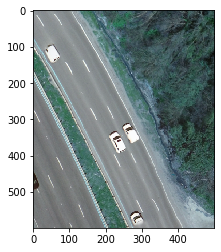

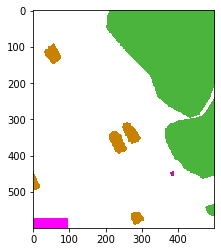

In [247]:
plt.imshow(iml[2500:3100, 4000:4500, :])
plt.figure()
plt.imshow(ll[2500:3100, 4000:4500, :])

In [245]:
img_paths[ii]

'/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/1553541487_APIGENERATED-000206.png'

In [256]:
count = 0
size = 300
shape = iml.shape
windowx=windowy=stridex=stridey=300

xsize = shape[1]
ysize = shape[0]

for xi in range(0, shape[1] - windowx, stridex):
    for yi in range(0, shape[0] - windowy, stridey):
        if count == 206:
            chip = iml[yi:yi+windowy, xi:xi+windowx, :]
            sys.exit()
        else:
            count += 1
        

SystemExit: 

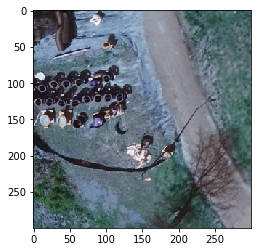

In [257]:
plt.imshow(chip)
#plt.imshow(cv2.imread(img_paths[ii]))

In [239]:
img_paths[ii]

'/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/1553541487_APIGENERATED-000206.png'

In [4]:
img_paths = sorted(glob.glob('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/*'))

In [11]:
filenames = [img_path.split('/')[-1] for img_path in img_paths]
train_split = np.random.choice(filenames, size=int(0.8 * len(filenames)), replace=False)
val_split = [filename for filename in filenames if filename not in train_split]

In [14]:
if not os.path.exists('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/train/'):
    os.mkdir('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/train/')
if not os.path.exists('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/val/'):
    os.mkdir('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/val/')
if not os.path.exists('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/label-chips/train/'):
    os.mkdir('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/label-chips/train/')
if not os.path.exists('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/label-chips/val/'):
    os.mkdir('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/label-chips/val/')

In [16]:
for filename in filenames:
    if filename in train_split:
        shutil.move('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/label-chips/' + filename, '/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/label-chips/train/' + filename)
    else:
        shutil.move('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/label-chips/' + filename, '/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/label-chips/val/' + filename)

In [17]:
for filename in filenames:
    if filename in train_split:
        shutil.move('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/' + filename, '/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/train/' + filename)
    else:
        shutil.move('/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/' + filename, '/mnt/sandbox/datasets/RGB/drone_deploy/dataset-medium/image-chips/val/' + filename)